In [ ]:
1. Import the necessary libraries
2. Read the data as a data frame
3. Perform basic EDA which should include the following and print out your insights at every step.
a. Shape of the data
b. Data type of each attribute
c. Checking the presence of missing values
d. 5 point summary of numerical attributes
e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
h. Distribution of categorical columns (include children)
i. Pair plot that includes all the columns of the dataframe

4. Answer the following questions with statistical evidence
a. Do charges of people who smoke differ significantly from the people who don't?
b. Does bmi of males differ significantly from that of females?
c. Is the proportion of smokers significantly different in different genders?
d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [3]:
import numpy as np
import pandas as pd
print("Input Data and Shape")
d=pd.read_csv('insurance.csv')
print(d.shape)
print(d.head())
print(d.columns)

Input Data and Shape
(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
print(d.dtypes)
print("\n")
print("Summary of Numerical Attributes\n")
d.describe()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Summary of Numerical Attributes



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
if (d.isnull().sum().sum()==0):
    print("There are no missing values \n",d.isnull().sum().sum())


There are no missing values 
 0


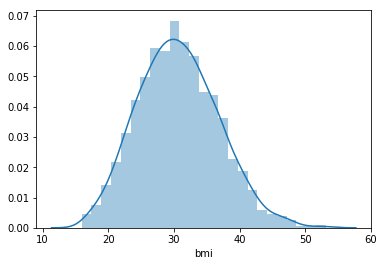

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.distplot(d['bmi'])
plt.show()


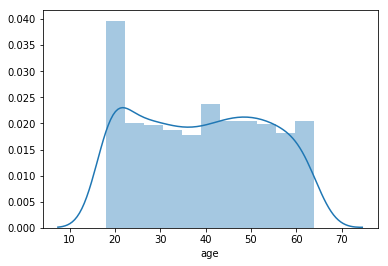

In [14]:
sns.distplot(d['age'])
plt.show()

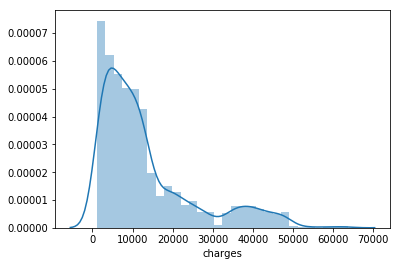

In [15]:
sns.distplot(d['charges'])
plt.show()

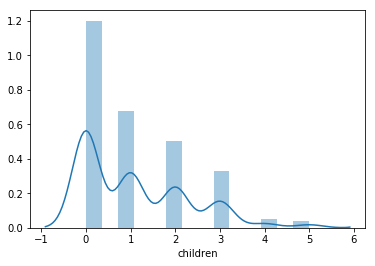

In [16]:
sns.distplot(d['children'])
plt.show()

In [9]:
d_dummies=pd.get_dummies(d)
print(d_dummies.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

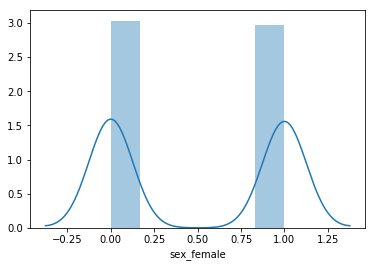

In [19]:
sns.distplot(d_dummies['sex_female'])
plt.show()

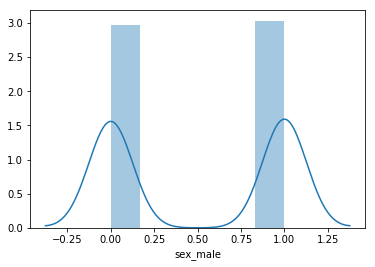

In [26]:
sns.distplot(d_dummies['sex_male'])
plt.show()

In [81]:
from scipy.stats import skew
print("Skewness of Age is \n",skew(d.age))
print("Skewness of BMI is \n",skew(d.bmi))
print("Skewness of Charges is \n",skew(d.charges))

Skewness of Age is 
 0.055610083072599126
Skewness of BMI is 
 0.28372857291709386
Skewness of Charges is 
 1.5141797118745743


# Observations
Age is Normally distributed however its skew is also given above.
the other variables are not normally distributed


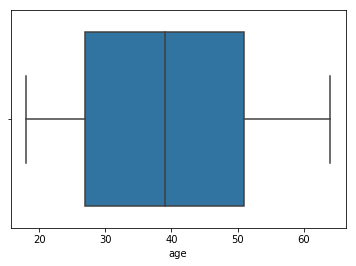

In [83]:
import seaborn as sns
sns.boxplot(x=d['age'])

# No outliers in Age column

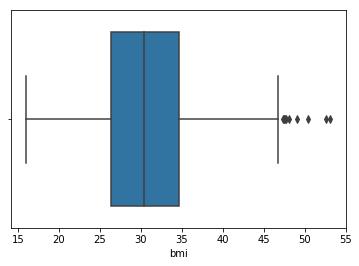

In [84]:
sns.boxplot(x=d['bmi'])

In [10]:
from scipy import stats
z = np.abs(stats.zscore(d_dummies))
print(z)


[[1.43876426 0.45332    0.90861367 ... 0.56641788 0.61132367 1.76548098]
 [1.50996545 0.5096211  0.07876719 ... 0.56641788 1.63579466 0.56641788]
 [0.79795355 0.38330685 1.58092576 ... 0.56641788 1.63579466 0.56641788]
 ...
 [1.50996545 1.0148781  0.90861367 ... 0.56641788 1.63579466 0.56641788]
 [1.29636188 0.79781341 0.90861367 ... 0.56641788 0.61132367 1.76548098]
 [1.55168573 0.26138796 0.90861367 ... 1.76548098 0.61132367 0.56641788]]


In [12]:
threshold = 3
print("The following are the outliers \n",np.where(z > 3))

The following are the outliers for BMI and charges 
 (array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 3, 1], dtype=int64))


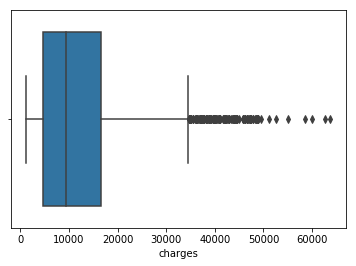

In [86]:
sns.boxplot(x=d['charges'])

# There are no outliers in Age. Most of the outliers are in charges.

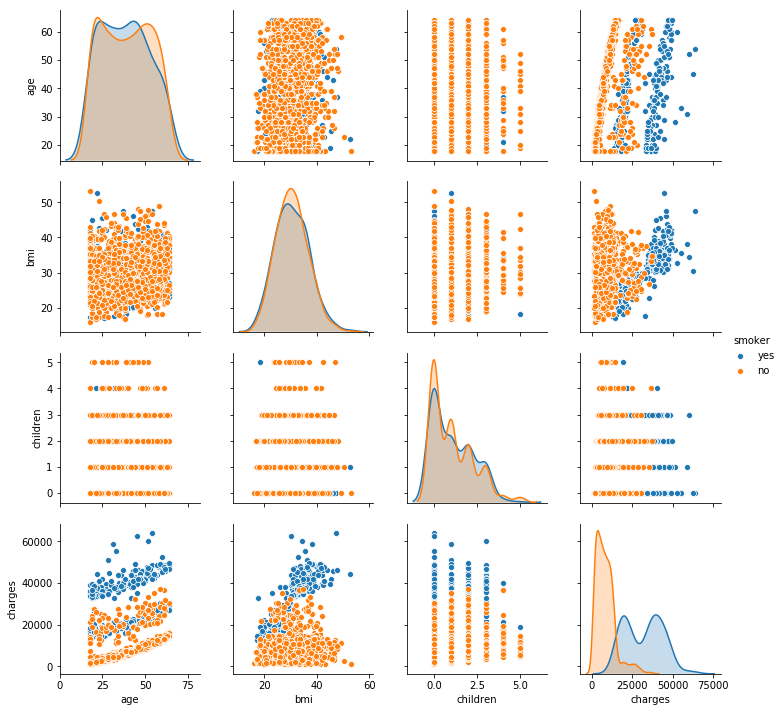

In [32]:
sns.pairplot(d,hue='smoker')

In [ ]:
# Do charges of people who smoke differ significantly from the people who don't?

# The blue clusters above for all categories age bmi and children show that the average charges of smokers is high

In [ ]:
# Does bmi of males differ significantly from that of females?

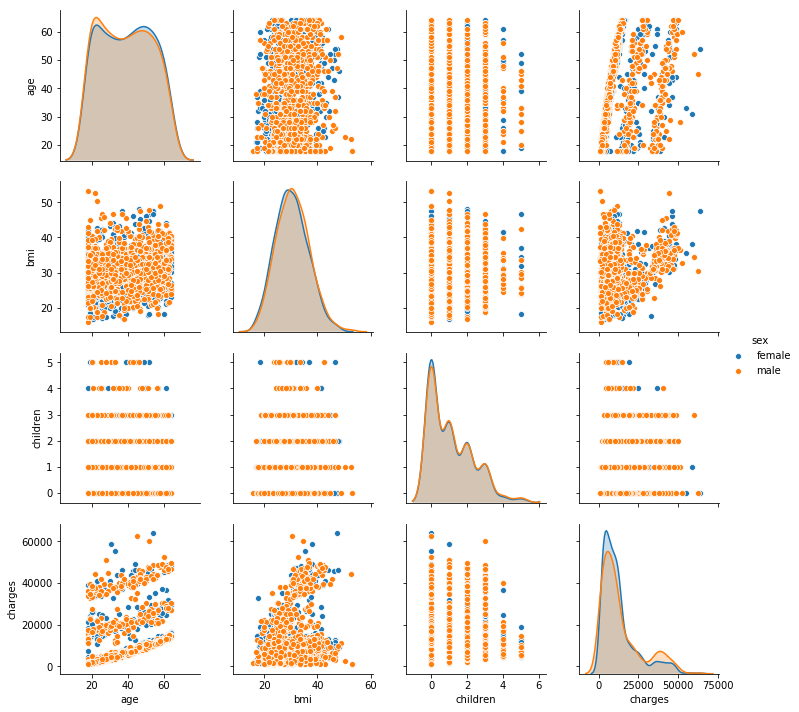

In [30]:
sns.pairplot(d,hue='sex')

# No the BMI of males is not significantly different from females. 
# Looking at the BMI plot above we see that females have BMI below 20 as well as above 40

In [29]:
d_sex=d.groupby(d_dummies['sex_male'])
d_gender=d_sex.describe()
d_des=d_gender.transpose
print(d_des)

<bound method DataFrame.transpose of             age                                                         bmi  \
          count       mean        std   min   25%   50%    75%   max  count   
sex_male                                                                      
0         662.0  39.503021  14.054223  18.0  27.0  40.0  51.75  64.0  662.0   
1         676.0  38.917160  14.050141  18.0  26.0  39.0  51.00  64.0  676.0   

                     ... children      charges                              \
               mean  ...      75%  max   count          mean           std   
sex_male             ...                                                     
0         30.377749  ...      2.0  5.0   662.0  12569.578844  11128.703801   
1         30.943129  ...      2.0  5.0   676.0  13956.751178  12971.025915   

                                                                       
                min        25%         50%           75%          max  
sex_male                        

In [75]:
d_child=d.groupby(d['children'])
d_children=d_child.describe()
d_children.transpose

<bound method DataFrame.transpose of             age                                                         bmi  \
          count       mean        std   min    25%   50%   75%   max  count   
children                                                                      
0         574.0  38.444251  16.436228  18.0  22.00  36.0  55.0  64.0  574.0   
1         324.0  39.453704  12.067445  18.0  30.00  40.0  49.0  64.0  324.0   
2         240.0  39.445833  11.588715  18.0  30.00  40.0  48.0  64.0  240.0   
3         157.0  41.566879  12.206174  18.0  31.00  41.0  52.0  64.0  157.0   
4          25.0  39.000000  12.138094  18.0  29.00  39.0  48.0  61.0   25.0   
5          18.0  35.611111  10.123583  19.0  28.75  39.0  42.5  52.0   18.0   

                     ...                  charges                              \
               mean  ...       75%    max   count          mean           std   
children             ...                                                        
0       

C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


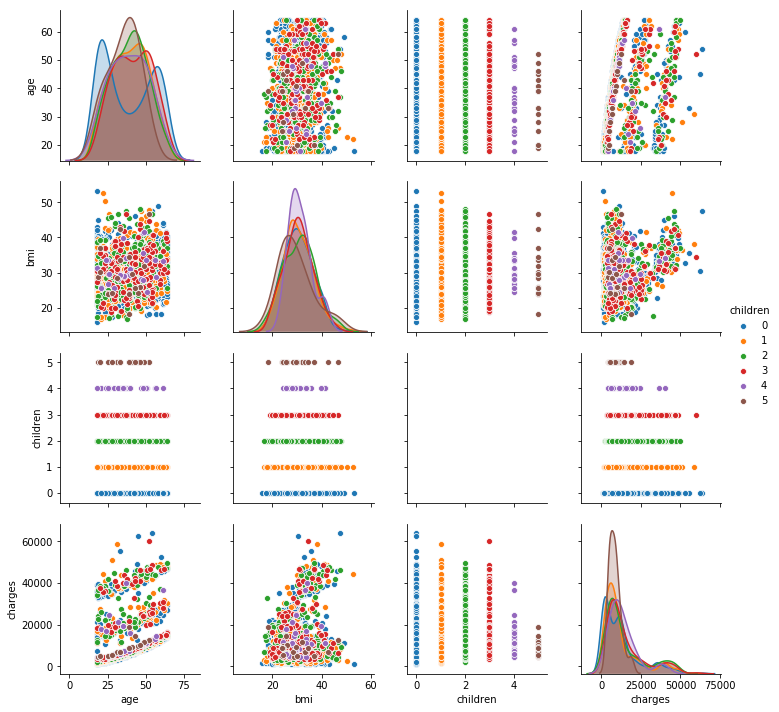

In [76]:
sns.pairplot(d,hue='children')

In [ ]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?

# As seen in the ditribution of BMI there is slight variation in the mean value of BMI. The variance is almost the same but the peaks corresponding to various children are different. Hence BMI of women does vary with the number of children.

In [24]:
d_dummies.groupby(by=['smoker_yes','sex_male'], as_index=False).count()


,smoker_yes,sex_male,age,bmi,children,charges,sex_female,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,547,547,547,547,547,547,547,547,547,547
1,0,1,517,517,517,517,517,517,517,517,517,517
2,1,0,115,115,115,115,115,115,115,115,115,115
3,1,1,159,159,159,159,159,159,159,159,159,159


In [ ]:
#Is the proportion of smokers significantly different in different genders?

# We have 159 male smokers and 115 female smokers. Proportion of smokers across genders is different.

In [31]:
d_smoker=d.groupby(d_dummies['smoker_yes'])
d_smoker.describe()

age                                                       \
             count       mean        std   min    25%   50%   75%   max   
smoker_yes                                                                
0           1064.0  39.385338  14.083410  18.0  26.75  40.0  52.0  64.0   
1            274.0  38.514599  13.923186  18.0  27.00  38.0  49.0  64.0   

               bmi             ... children      charges                \
             count       mean  ...      75%  max   count          mean   
smoker_yes                     ...                                       
0           1064.0  30.651795  ...      2.0  5.0  1064.0   8434.268298   
1            274.0  30.708449  ...      2.0  5.0   274.0  32050.231832   

                                                                               \
                     std         min           25%          50%           75%   
smoker_yes                                                                      
0            5993.781819   1121.8739   3986.438700   7345.40530  11362.887050   
1           11541.547176  12829.4551  20826.244213  34456.34845  41019.207275   

                         
                    max  
smoker_yes               
0           36910.60803  
1           63770.42801  

[2 rows x 32 columns]

# Mean Charge of People who smoke is 5993.78, Mean charge of people who don't smoke is 11541.54.